
Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])
print(m)



In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [53]:
a = np.diag([-1,1]) #a) Диагональная, ортогональная, но не единичная(!)

In [54]:
AT = a.transpose()

In [55]:
a.dot(AT)

array([[1, 0],
       [0, 1]])

In [76]:
w = np.tril([[1,2],[1,0.5]], 0) #c) Нижнетреугольная, ортогональная
w

array([[1. , 0. ],
       [1. , 0.5]])

In [77]:
AW = w.transpose()
AW

array([[1. , 1. ],
       [0. , 0.5]])

In [78]:
w.dot(AW)

array([[1.  , 1.  ],
       [1.  , 1.25]])

In [47]:
z = np.triu([[1,2],[3,4]], 0) #b) Верхнетреугольная, ортогональная
z

array([[1, 2],
       [0, 4]])

In [63]:
AZ = z.transpose()
AZ

array([[1, 0],
       [2, 4]])

In [49]:
z.dot(AZ)

array([[ 5,  8],
       [ 8, 16]])

In [34]:
O = np.array([[3, 2], [4, 3]]) #d) Матрица, у которой определитель = 1, и все элементы не равны 0
O

array([[3, 2],
       [4, 3]])

In [35]:
np.linalg.det(O) 

1.0

In [36]:
m = np.array([[2, 2], #Найдите собственные значения и собственные вектора матриц
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [37]:
w, v = np.linalg.eig(m)

In [38]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))


Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]



Уровень 1:

Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])
print(m)

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*



У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [79]:
m = np.array([[1, 2], [2,3]])
print(m)

[[1 2]
 [2 3]]


In [80]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [81]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [87]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [88]:
X, y = load_digits(return_X_y=True)

In [89]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


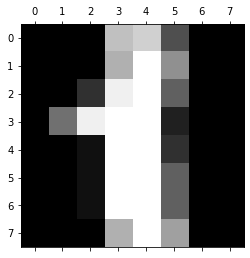

In [90]:
image = X[1]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [91]:
U, s, V = np.linalg.svd(image)
n_component = 3
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -0.32 0.16 12.00 12.98 5.03 0.00 0.00]
 [0.00 -0.09 0.10 11.26 15.65 9.27 0.00 0.00]
 [0.00 0.79 2.57 14.92 16.17 5.83 0.00 0.00]
 [0.00 6.89 15.06 16.02 15.97 2.03 0.00 0.00]
 [0.00 -0.13 1.17 16.48 15.35 3.50 0.00 0.00]
 [0.00 -0.07 0.98 15.69 16.40 5.69 0.00 0.00]
 [0.00 -0.07 0.98 15.69 16.40 5.69 0.00 0.00]
 [0.00 -0.07 0.03 10.99 16.00 10.00 0.00 0.00]]


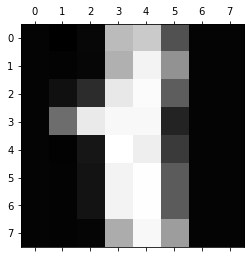

In [92]:
plt.matshow(A, cmap = 'gray')

In [93]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9727323316638843

In [94]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8479582773223131

In [95]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9660545353366722

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

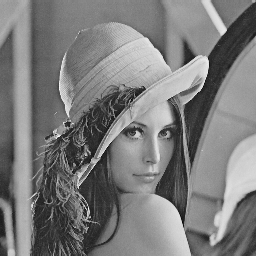

In [129]:
from PIL import Image
img = Image.open("Lena.png")
arr = np.array(img.getdata())
img

In [130]:
print(arr.size)
print(arr.size ** 0.5)

65536
256.0


In [124]:
X = np.resize(arr, (256, 256))

In [125]:
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])

5


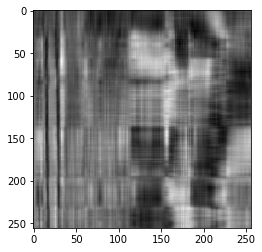

10


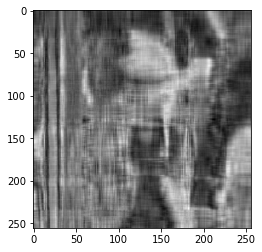

15


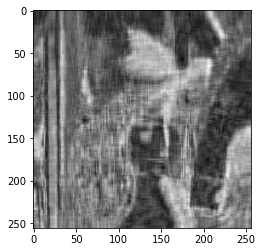

20


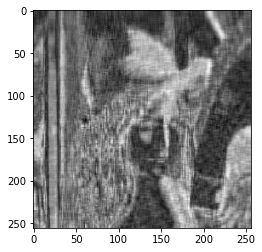

25


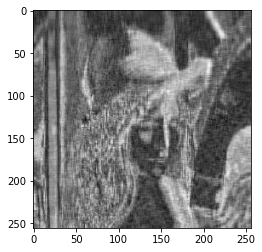

30


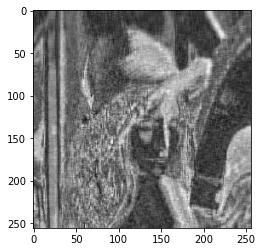

35


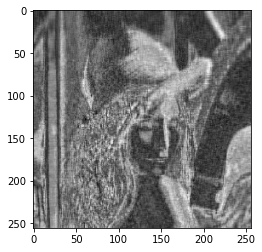

40


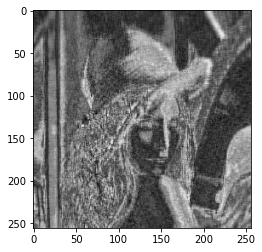

45


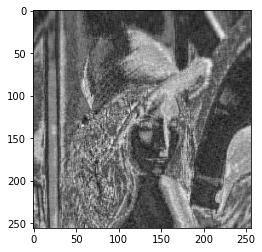

In [126]:
for k in range(5, 50, 5):
    D1 = D.copy()
    D1[D1 < d[int(k)]] = 0
    print (int(k))
    X1 = np.dot(np.dot(U, D1), Vt)
    pl.imshow(X1, cmap='gray')
    pl.show()